## 201612 data

In [49]:
import sys

filename_raw = '../../data/03_ShawnJe/Je201710_Lipidomics/201612_OrganoidLipidomics.raw.txt'
filename_out = '../../data/03_ShawnJe/Je201710_Lipidomics/201612_OrganoidLipidomics.refined.txt'

f_raw = open(filename_raw,'r')
target_list = [x.split(',')[0].replace(' ','').replace('"','').strip() for x in f_raw.readline().split("\t")[1:]]
#print("\n".join(sorted(target_list)))

t2s = dict()
for tmp_t in target_list:
    t2s[tmp_t] = dict()

sample_list = []
for line in f_raw:
    tmp_tokens = line.strip().split("\t")
    tmp_sample_name = tmp_tokens[0].replace(' ','_').replace('Hg','').replace('Lipo','Div')
    sample_list.append(tmp_sample_name)
    is_missed = 0
    for i in range(1,len(tmp_tokens)):
        if tmp_tokens[i] != '_':
            t2s[target_list[i-1]][tmp_sample_name] = float(tmp_tokens[i])
        else:
            t2s[target_list[i-1]][tmp_sample_name] = 0.0
f_raw.close()

count = 0
f_out = open(filename_out,'w')
f_out.write("TargetName\t%s\n"%("\t".join(sorted(sample_list))))
for tmp_t in sorted(target_list):
    out_str_list = []
    count_zero = 0
    for tmp_s in sorted(sample_list):
        if tmp_s in t2s[tmp_t]:
            out_str_list.append( '%.05f'%t2s[tmp_t][tmp_s] )
            if t2s[tmp_t][tmp_s] == 0:
                count_zero += 1
        else:
            count_zero += 1
            
    if len(out_str_list) != len(sample_list):
        sys.stderr.write('Skip: %s\n'%tmp_t)
        continue
    
    if count_zero > len(sample_list)*0.2:
        sys.stderr.write('Skip due to zeros: %s\n'%tmp_t)
        continue
        
    count += 1
    f_out.write( "%s\t%s\n"%(tmp_t, "\t".join(out_str_list)) )
f_out.close()
                            

Skip due to zeros: 1Cer(d18:1/17:0)
Skip due to zeros: 1Cer(d18:1/20:1)
Skip due to zeros: 1Cer(d18:1/20:4)
Skip due to zeros: 1Cer(d18:1/26:0)
Skip due to zeros: 1Cer(d18:1/26:1(17Z))
Skip due to zeros: 1Cer(d18:1/2:0)
Skip due to zeros: 2Cer(d18:0/13:0)
Skip due to zeros: 2Cer(d18:0/14:0)
Skip due to zeros: 2Cer(d18:0/15:0)
Skip due to zeros: 2Cer(d18:0/17:0)
Skip due to zeros: 2Cer(d18:0/18:1(9Z))
Skip due to zeros: 2Cer(d18:0/20:0)
Skip due to zeros: 2Cer(d18:0/22:0)
Skip due to zeros: 2Cer(d18:0/24:0)
Skip due to zeros: 2Cer(d18:0/26:0)
Skip due to zeros: 2Cer(d18:0/26:1(17Z))
Skip due to zeros: 2Cer(d18:0/h17:0)
Skip due to zeros: 2Cer(d18:0/h24:0)
Skip due to zeros: 2Cer(d18:0/h26:0)
Skip due to zeros: DHSM(d18:0/13:0)
Skip due to zeros: DHSM(d18:0/26:0)
Skip due to zeros: DHSM(d18:0/26:1)
Skip due to zeros: GlcCer(d18:0/20:0)
Skip due to zeros: GlcCer(d18:0/22:0)
Skip due to zeros: GlcCer(d18:0/24:0)
Skip due to zeros: GlcCer(d18:0/24:1(15Z))
Skip due to zeros: GlcCer(d18:0/26:

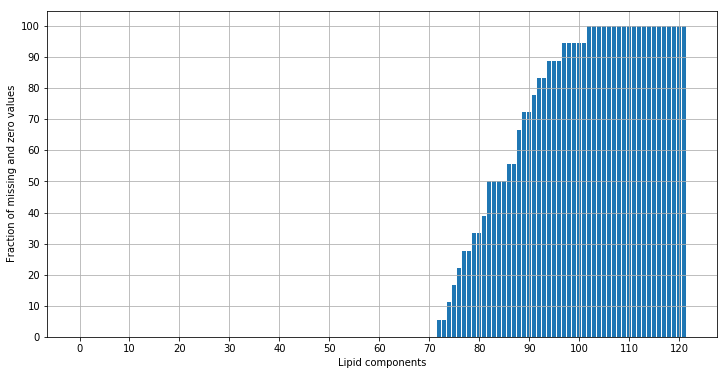

< 20 pct missing values: 76


In [48]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,1,1)
missed_values = []
for tmp_t in target_list:
    tmp_values = [t2s[tmp_t][tmp_s] for tmp_s in sample_list]
    tmp_missed_fraction = len([x for x in tmp_values if x == 0])/len(tmp_values)*100.0
    missed_values.append( tmp_missed_fraction )
ax1.bar(range(0,len(missed_values)), sorted(missed_values))
ax1.grid()
ax1.set_xlabel("Lipid components")
ax1.set_ylabel("Fraction of missing and zero values")
ax1.set_xticks(range(0,len(target_list), 10))
ax1.set_yticks(range(0,101,10))
plt.show()

print("< 20 pct missing values: %d"%len([x for x in missed_values if x < 20]))


## Limma

Compound	MeanSignal	FDR	log2FC	95pctCI.L	95pctCI.R
GlcCer(d18:1/18:0)	13.14	2.49e-10	-2.83	-2.46	-3.20
GlcCer(d18:0/16:0)	8.57	1.28e-09	-2.01	-1.71	-2.31
GlcCer(d18:1/24:1(15Z))	10.75	7.49e-09	-2.19	-1.81	-2.57
GlcCer(d18:0/18:0)	8.38	7.49e-09	-1.96	-1.62	-2.30
GlcCer(d18:1/20:0)	10.84	1.51e-08	-1.91	-1.56	-2.26
GlcCer(d18:1/22:0)	9.74	2.39e-08	-1.52	-1.23	-1.80
GlcCer(d18:1/14:0)	9.07	3.37e-07	-1.51	-1.17	-1.86
GlcCer(d18:1/16:0)	13.53	2.94e-06	-2.62	-1.92	-3.32
SM(d18:1/22:0)	9.06	1.71e-04	0.80	0.50	1.10
PC(37:6)	10.70	3.70e-04	0.85	0.51	1.20
SM(d18:1/24:1)	11.45	7.52e-04	0.76	0.43	1.09
SM(d18:1/20:0)	10.10	7.80e-04	0.85	0.47	1.23
DHSM(d18:0/16:0)	11.43	2.58e-03	0.85	0.42	1.28
SM(d18:1/18:0)	13.66	1.13e-02	0.60	0.22	0.97


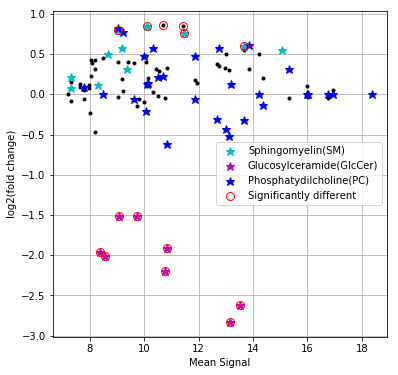

In [109]:
import math

filename_limma = '../../data/03_ShawnJe/Je201710_Lipidomics/201612_OrganoidLipidomics.GBA-WT.limma_out.txt'

f_limma = open(filename_limma,'r')

headers = f_limma.readline().replace('"','').strip().split()
#print(headers)
idx_FDR = headers.index('adj.P.Val') + 1
idx_CIL = headers.index('CI.L') + 1
idx_CIR = headers.index('CI.R') + 1
idx_AveExpr = headers.index('AveExpr') + 1
idx_logFC = headers.index('logFC') + 1

M_list = []
A_list = []
M_DE_list = []
A_DE_list = []
M_Glc_list = []
A_Glc_list = []
M_SM_list = []
A_SM_list = []

print("Compound\tMeanSignal\tFDR\tlog2FC\t95pctCI.L\t95pctCI.R")
for line in f_limma:
    tokens = line.strip().split()
    tmp_id = tokens[0].replace('"','')
    tmp_FDR = float(tokens[idx_FDR])
    tmp_CIL = float(tokens[idx_CIL])
    tmp_CIR = float(tokens[idx_CIR])
    tmp_logFC = float(tokens[idx_logFC])
    tmp_avg = float(tokens[idx_AveExpr])
    #print(tmp_id.split('(')[0])
    
    M_list.append(tmp_avg)
    A_list.append(tmp_logFC)
    
    if tmp_id.startswith('SM'):
        M_SM_list.append(tmp_avg)
        A_SM_list.append(tmp_logFC)
    if tmp_id.startswith('Glc'):
        M_Glc_list.append(tmp_avg)
        A_Glc_list.append(tmp_logFC)
        
    if tmp_FDR < 0.05 and abs(tmp_logFC) > math.log(1.5)/math.log(2):
    #if tmp_id.startswith('DHSM'):
        M_DE_list.append(tmp_avg)
        A_DE_list.append(tmp_logFC)
        if tmp_logFC > 0:
            print("%s\t%.2f\t%.2e\t%.2f\t%.2f\t%.2f"%(tmp_id, tmp_avg, tmp_FDR, tmp_logFC, tmp_CIL, tmp_CIR))
        else:
            print("%s\t%.2f\t%.2e\t%.2f\t%.2f\t%.2f"%(tmp_id, tmp_avg, tmp_FDR, tmp_logFC, tmp_CIR, tmp_CIL))
f_limma.close()

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(M_list, A_list, 'k.')
ax1.plot(M_SM_list, A_SM_list, 'c*', ms=9, label='Sphingomyelin(SM)')
ax1.plot(M_Glc_list, A_Glc_list, 'm*', ms=9, label='Glucosylceramide(GlcCer)')
ax1.plot(M_PC_list, A_PC_list, 'b*', ms=9, label='Phosphatydilcholine(PC)')
ax1.plot(M_DE_list, A_DE_list, 'o', ms=8, markerfacecolor="None", markeredgecolor='red', markeredgewidth=1, label='Significantly different')
ax1.grid()
ax1.legend()
ax1.set_xlabel("Mean Signal")
ax1.set_ylabel("log2(fold change)")
plt.show()

Compound	MeanSignal	FDR	log2FC	95pctCI.L	95pctCI.R
1Cer(d18:1/18:0)	11.95	7.25e-06	1.87	1.47	2.28
PC(38:3a)	13.11	1.06e-04	-0.65	-0.46	-0.85
SM(d18:1/16:0)	15.06	1.06e-04	-0.93	-0.66	-1.21
LacCer(d18:1/18:0)	9.75	8.10e-04	0.85	0.53	1.17
PC(32:2)	13.87	1.30e-03	0.67	0.40	0.94
DHSM(d18:0/16:0)	11.43	1.66e-03	-1.00	-0.58	-1.42
SM(d18:1/22:1)	9.36	2.38e-03	-0.81	-0.45	-1.17
PC(34:3a)	12.77	2.38e-03	0.76	0.41	1.10
1Cer(d18:1/16:0)	12.99	2.38e-03	1.10	0.60	1.60
GlcCer(d18:1/16:0)	13.53	2.38e-03	0.94	0.51	1.38
PC(36:0)	13.00	4.70e-03	-0.64	-0.32	-0.96
1Cer(d18:1/20:0)	9.05	1.03e-02	0.74	0.31	1.17
GlcCer(d18:1/18:0)	13.14	1.12e-02	0.65	0.26	1.04
1Cer(d18:1/22:1)	8.20	3.69e-02	0.72	0.18	1.26


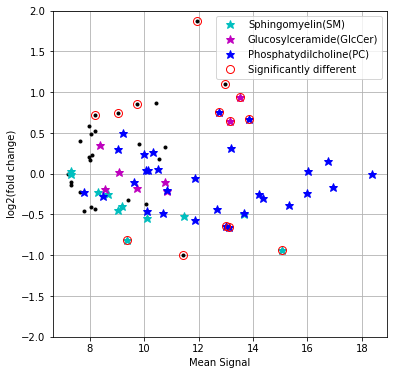

In [127]:

filename_limma = '../../data/03_ShawnJe/Je201710_Lipidomics/201612_OrganoidLipidomics.GBA_Div90-Div30.limma_out.txt'

f_limma = open(filename_limma,'r')

headers = f_limma.readline().replace('"','').strip().split()
#print(headers)
idx_FDR = headers.index('adj.P.Val') + 1
idx_CIL = headers.index('CI.L') + 1
idx_CIR = headers.index('CI.R') + 1
idx_AveExpr = headers.index('AveExpr') + 1
idx_logFC = headers.index('logFC') + 1

M_list = []
A_list = []
M_DE_list = []
A_DE_list = []
M_Glc_list = []
A_Glc_list = []
M_SM_list = []
A_SM_list = []
M_PC_list = []
A_PC_list = []

print("Compound\tMeanSignal\tFDR\tlog2FC\t95pctCI.L\t95pctCI.R")
for line in f_limma:
    tokens = line.strip().split()
    tmp_id = tokens[0].replace('"','')
    tmp_FDR = float(tokens[idx_FDR])
    tmp_CIL = float(tokens[idx_CIL])
    tmp_CIR = float(tokens[idx_CIR])
    tmp_logFC = float(tokens[idx_logFC])
    tmp_avg = float(tokens[idx_AveExpr])
    
    M_list.append(tmp_avg)
    A_list.append(tmp_logFC)
    
    if tmp_id.startswith('SM'):
        M_SM_list.append(tmp_avg)
        A_SM_list.append(tmp_logFC)
    if tmp_id.startswith('Glc'):
        M_Glc_list.append(tmp_avg)
        A_Glc_list.append(tmp_logFC)
    if tmp_id.startswith('PC'):
        M_PC_list.append(tmp_avg)
        A_PC_list.append(tmp_logFC)
        
    if tmp_FDR < 0.05 and abs(tmp_logFC) > math.log(1.5)/math.log(2):
    #if tmp_id.startswith('DHSM'):
        M_DE_list.append(tmp_avg)
        A_DE_list.append(tmp_logFC)
        if tmp_logFC > 0:
            print("%s\t%.2f\t%.2e\t%.2f\t%.2f\t%.2f"%(tmp_id, tmp_avg, tmp_FDR, tmp_logFC, tmp_CIL, tmp_CIR))
        else:
            print("%s\t%.2f\t%.2e\t%.2f\t%.2f\t%.2f"%(tmp_id, tmp_avg, tmp_FDR, tmp_logFC, tmp_CIR, tmp_CIL))
f_limma.close()

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(M_list, A_list, 'k.')
ax1.plot(M_SM_list, A_SM_list, 'c*', ms=9, label='Sphingomyelin(SM)')
ax1.plot(M_Glc_list, A_Glc_list, 'm*', ms=9, label='Glucosylceramide(GlcCer)')
ax1.plot(M_PC_list, A_PC_list, 'b*', ms=9, label='Phosphatydilcholine(PC)')
ax1.plot(M_DE_list, A_DE_list, 'o', ms=8, markerfacecolor="None", markeredgecolor='red', markeredgewidth=1, label='Significantly different')
ax1.grid()
ax1.legend(loc='upper right')
ax1.set_xlabel("Mean Signal")
ax1.set_ylabel("log2(fold change)")
ax1.set_ylim( -2, 2 )
plt.show()

## 201708 data

In [24]:
filename_raw = '../../data/03_ShawnJe/Je201710_Lipidomics/201708_OrganoidLipidomics.raw.txt'
filename_out = '../../data/03_ShawnJe/Je201710_Lipidomics/201708_OrganoidLipidomics.refined.txt'

f_raw = open(filename_raw,'r')
target_list = [x.split(',')[0].replace(' ','').replace('"','') for x in f_raw.readline().strip().split("\t")]
#print("\n".join(target_list))

t2s = dict()
for tmp_t in target_list:
    t2s[tmp_t] = dict()

sample_list = []
for line in f_raw:
    tmp_tokens = line.split("\t")
    if len(tmp_tokens) <= 2 :
        continue
        
    tmp_sample_name = tmp_tokens[1].replace(' ','_').replace('Hg','').replace('Lipo','Div')
    sample_list.append(tmp_sample_name)
    for i in range(2,len(tmp_tokens)):
        if tmp_tokens[i] != '-':
            t2s[target_list[i-1]][tmp_sample_name] = float(tmp_tokens[i])
        else:
            t2s[target_list[i-1]][tmp_sample_name] = 0.0
    #print(tmp_sample_name)
f_raw.close()

count = 0
f_out = open(filename_out,'w')
f_out.write("TargetName\t%s\n"%("\t".join(sorted(sample_list))))
for tmp_t in sorted(target_list):
    out_str_list = []
    for tmp_s in sorted(sample_list):
        if tmp_s in t2s[tmp_t]:
            out_str_list.append( '%.05f'%t2s[tmp_t][tmp_s] )
    if len(out_str_list) != len(sample_list):
        sys.stderr.write('Skip: %s\n'%tmp_t)
        continue
    
    count += 1
    f_out.write( "%s\t%s\n"%(tmp_t, "\t".join(out_str_list)) )
f_out.close()
                            

No
SampleID
1Cer(d18:1/14:0)
1Cer(d18:1/16:0)
1Cer(d18:1/17:0)
1Cer(d18:1/18:0)
1Cer(d18:1/18:1(9Z))
1Cer(d18:1/19:0)
1Cer(d18:1/2:0)
1Cer(d18:1/20:0)
1Cer(d18:1/20:1)
1Cer(d18:1/20:4)
1Cer(d18:1/22:0)
1Cer(d18:1/22:1)
1Cer(d18:1/23:0)
1Cer(d18:1/24:0)
1Cer(d18:1/24:1(15Z))
1Cer(d18:1/26:0)
1Cer(d18:1/26:1(17Z))
2Cer(d18:0/13:0)
2Cer(d18:0/14:0)
2Cer(d18:0/15:0)
2Cer(d18:0/16:0)
2Cer(d18:0/17:0)
2Cer(d18:0/18:0)
2Cer(d18:0/18:1(9Z))
2Cer(d18:0/20:0)
2Cer(d18:0/22:0)
2Cer(d18:0/24:0)
2Cer(d18:0/24:1(15Z))
2Cer(d18:0/26:0)
2Cer(d18:0/26:1(17Z))
2Cer(d18:0/h17:0)
2Cer(d18:0/h24:0)
2Cer(d18:0/h26:0)
DHSM(d18:0/20:0)
DHSM(d18:0/22:0)
DHSM(d18:0/26:1)
DHSM(d18:0/13:0)
DHSM(d18:0/14:0)
DHSM(d18:0/15:0)
DHSM(d18:0/16:0)
DHSM(d18:0/17:0)
DHSM(d18:0/18:0)
DHSM(d18:0/18:2)
DHSM(d18:0/24:0)
DHSM(d18:0/26:0)
GlcCer(d18:0/16:0)
GlcCer(d18:0/18:0)
GlcCer(d18:0/20:0)
GlcCer(d18:0/22:0)
GlcCer(d18:0/24:0)
GlcCer(d18:0/24:1(15Z))
GlcCer(d18:0/26:0)
GlcCer(d18:0/26:1(17Z))
GlcCer(d18:1/14:0)
GlcCer(d18:1

ValueError: could not convert string to float: 